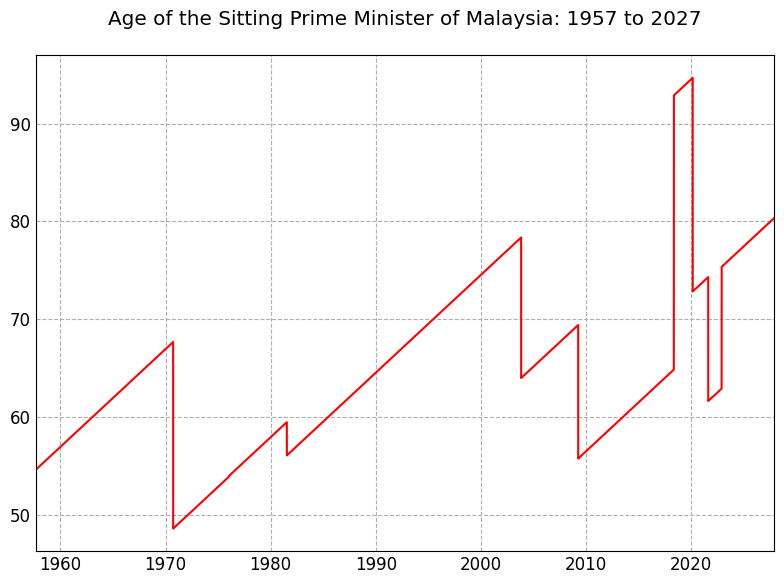

In [7]:
import pandas as pd
from datetime import date,datetime,timedelta
import matplotlib.pyplot as plt

data = [
    ['1957-08-31',''],
    ['1970-09-22','1903-02-08'],
    ['1976-01-14','1922-03-11'],
    ['1981-07-16','1922-02-12'],
    ['2003-10-30','1925-07-10'],
    ['2009-04-03','1939-11-26'],
    ['2018-05-09','1953-07-23'],
    ['2020-02-24','1925-07-10'],
    ['2021-08-16','1947-05-15'],
    ['2022-11-24','1960-01-18'],
    ['2027-11-19','1947-08-10']
]

tf = pd.DataFrame(data,columns=['date','birthday'])
for c in tf.columns: tf[c] = pd.to_datetime(tf[c]).dt.date

sdate,edate = tf.date.iloc[0], tf.date.iloc[-1] + timedelta(1)
df = pd.DataFrame(columns=['date'])
df.date = [sdate + timedelta(x) for x in range((edate-sdate).days)]

df = pd.merge(df,tf,on='date',how='left').bfill()
for c in df.columns: df[c] = pd.to_datetime(df[c])
df['age'] = (df.date-df.birthday).dt.days/365
df = df.set_index('date')

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'font.size': 12,
                     'font.family': 'sans-serif',
                     'grid.linestyle': 'dashed'})
plt.rcParams["figure.figsize"] = [8,6]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()

df['age'].plot(ax=ax, color='red')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_axisbelow(True)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel('')
ax.set_title('Age of the Sitting Prime Minister of Malaysia: 1957 to 2027\n')
plt.show()